In [1]:
import pandas as pd
import numpy as np

from functools import reduce
from copy import deepcopy

In [2]:
df = pd.read_excel('../data/climate_change_download_0.xls')

In [3]:
#Data for processing
df.head()

,Country code,Country name,Series code,Series name,SCALE,Decimals,1990,1991,1992,1993,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
0,ABW,Aruba,AG.LND.EL5M.ZS,Land area below 5m (% of land area),0,1,29.57481,..,..,..,...,..,..,..,..,..,..,..,..,..,..
1,ADO,Andorra,AG.LND.EL5M.ZS,Land area below 5m (% of land area),0,1,0,..,..,..,...,..,..,..,..,..,..,..,..,..,..
2,AFG,Afghanistan,AG.LND.EL5M.ZS,Land area below 5m (% of land area),0,1,0,..,..,..,...,..,..,..,..,..,..,..,..,..,..
3,AGO,Angola,AG.LND.EL5M.ZS,Land area below 5m (% of land area),0,1,0.208235,..,..,..,...,..,..,..,..,..,..,..,..,..,..
4,ALB,Albania,AG.LND.EL5M.ZS,Land area below 5m (% of land area),0,1,4.967875,..,..,..,...,..,..,..,..,..,..,..,..,..,..


In [4]:
#Summary of the data
df.describe()

,Country code,Country name,Series code,Series name,SCALE,Decimals,1990,1991,1992,1993,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
count,13512,13512,13512,13512,13512,13512,10017,10017,10017,10017,...,10017,10017,10017,10017,10017,10017,10017,10017,10017,12382
unique,233,233,58,58,2,3,4355,3398,3523,3583,...,3877,3869,4007,4484,4008,4047,4080,3506,2164,1434
top,ABW,Aruba,AG.LND.EL5M.ZS,Land area below 5m (% of land area),0,1,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..
freq,58,58,233,233,10017,5823,5163,6520,6364,6300,...,5960,5974,5792,4933,5781,5769,5414,6256,7685,10244


In [5]:
#Looking at the Scale column with unusal 'Text' value
df[df['SCALE']=='Text']

,Country code,Country name,Series code,Series name,SCALE,Decimals,1990,1991,1992,1993,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
3029,ABW,Aruba,EN.CLC.AERT,Annex-I emissions reduction target,Text,Text,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3030,ADO,Andorra,EN.CLC.AERT,Annex-I emissions reduction target,Text,Text,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3031,AFG,Afghanistan,EN.CLC.AERT,Annex-I emissions reduction target,Text,Text,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3032,AGO,Angola,EN.CLC.AERT,Annex-I emissions reduction target,Text,Text,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3033,ALB,Albania,EN.CLC.AERT,Annex-I emissions reduction target,Text,Text,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7218,YEM,"Yemen, Rep.",EN.CLC.RNET,Renewable energy target,Text,Text,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,..
7219,ZAF,South Africa,EN.CLC.RNET,Renewable energy target,Text,Text,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes
7220,ZAR,"Congo, Dem. Rep.",EN.CLC.RNET,Renewable energy target,Text,Text,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,..
7221,ZMB,Zambia,EN.CLC.RNET,Renewable energy target,Text,Text,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,..


In [6]:
#Looking at the Decimal column with unusal 'Text' value
df[df['Decimals']=='Text']

,Country code,Country name,Series code,Series name,SCALE,Decimals,1990,1991,1992,1993,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
3029,ABW,Aruba,EN.CLC.AERT,Annex-I emissions reduction target,Text,Text,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3030,ADO,Andorra,EN.CLC.AERT,Annex-I emissions reduction target,Text,Text,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3031,AFG,Afghanistan,EN.CLC.AERT,Annex-I emissions reduction target,Text,Text,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3032,AGO,Angola,EN.CLC.AERT,Annex-I emissions reduction target,Text,Text,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3033,ALB,Albania,EN.CLC.AERT,Annex-I emissions reduction target,Text,Text,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7218,YEM,"Yemen, Rep.",EN.CLC.RNET,Renewable energy target,Text,Text,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,..
7219,ZAF,South Africa,EN.CLC.RNET,Renewable energy target,Text,Text,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes
7220,ZAR,"Congo, Dem. Rep.",EN.CLC.RNET,Renewable energy target,Text,Text,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,..
7221,ZMB,Zambia,EN.CLC.RNET,Renewable energy target,Text,Text,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,..


In [7]:
print("Original shape:")
print(df.shape[0])

# remove rows characterized as "Text" in the SCALE column
df = df[df['SCALE']!='Text']

print("After dropping Text in Scale:")
print(df.shape[0])

Original shape:
13512
After dropping Text in Scale:
10017


In [8]:
print("Current shape:")
print(df.shape[1])

df = df.drop(['Country name', 'Series code', 'SCALE', 'Decimals'], axis='columns')

print("New Shape:")
print(df.shape[1])

Current shape:
28
New Shape:
24


In [9]:
#Replacing the ".." strings and emplty cells ("") into NaN values
df.iloc[:,2:] = df.iloc[:,2:].replace({'':np.nan, '..':np.nan})

In [10]:
#Transforming data columns to numerical
df = df.applymap(lambda x: pd.to_numeric(x, errors='ignore'))

df.dtypes

Country code     object
Series name      object
1990            float64
1991            float64
1992            float64
1993            float64
1994            float64
1995            float64
1996            float64
1997            float64
1998            float64
1999            float64
2000            float64
2001            float64
2002            float64
2003            float64
2004            float64
2005            float64
2006            float64
2007            float64
2008            float64
2009            float64
2010            float64
2011            float64
dtype: object

In [11]:
# Replacing column names
new_vars = {'Cereal yield (kg per hectare)': 'cereal_yield',
               'Foreign direct investment, net inflows (% of GDP)': 'fdi_perc_gdp',
               'Access to electricity (% of total population)': 'elec_access_perc',
               'Energy use per units of GDP (kg oil eq./$1,000 of 2005 PPP $)': 'en_per_gdp',
               'Energy use per capita (kilograms of oil equivalent)': 'en_per_cap',
               'CO2 emissions, total (KtCO2)': 'co2_ttl',
               'CO2 emissions per capita (metric tons)': 'co2_per_cap',
               'CO2 emissions per units of GDP (kg/$1,000 of 2005 PPP $)': 'co2_per_gdp',
               'Other GHG emissions, total (KtCO2e)': 'other_ghg_ttl',
               'Methane (CH4) emissions, total (KtCO2e)': 'ch4_ttl',
               'Nitrous oxide (N2O) emissions, total (KtCO2e)': 'n2o_ttl',
               'Droughts, floods, extreme temps (% pop. avg. 1990-2009)': 'nat_emerg',
               'Population in urban agglomerations >1million (%)': 'pop_urb_aggl_perc',
               'Nationally terrestrial protected areas (% of total land area)': 'prot_area_perc',
               'GDP ($)': 'gdp',
               'GNI per capita (Atlas $)': 'gni_per_cap',
               'Under-five mortality rate (per 1,000)': 'under_5_mort_rate',
               'Population growth (annual %)': 'pop_growth_perc',
               'Population': 'pop',
               'Urban population growth (annual %)': 'urb_pop_growth_perc',
               'Urban population': 'urb_pop'
                }

# rename all variables in the column "Series name" with comprehensible shorter versions
df['Series name'] = df['Series name'].replace(to_replace=new_vars)

In [12]:
df.head()

,Country code,Series name,1990,1991,1992,1993,1994,1995,1996,1997,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
0,ABW,Land area below 5m (% of land area),29.574810,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ADO,Land area below 5m (% of land area),0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AFG,Land area below 5m (% of land area),0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AGO,Land area below 5m (% of land area),0.208235,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ALB,Land area below 5m (% of land area),4.967875,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
new_col = list(new_vars.values())

features_list = []

for variable in new_col:
    temp = df[df['Series name'] == variable]
    
    # melt all the values for all years into one column and rename the columns correspondingly
    temp = temp.melt(id_vars=['Country code', 'Series name']).rename(columns={'Country code': 'country', 'variable': 'year', 'value': variable}).drop(['Series name'], axis='columns')
    
    # add the melted dataframe for the current feature into the list
    features_list.append(temp)

transformed_data = reduce(lambda left, right: pd.merge(left, right, on=['country','year'], how='outer'), features_list)

In [14]:
transformed_data.head()

,country,year,cereal_yield,fdi_perc_gdp,elec_access_perc,en_per_gdp,en_per_cap,co2_ttl,co2_per_cap,co2_per_gdp,...,nat_emerg,pop_urb_aggl_perc,prot_area_perc,gdp,gni_per_cap,under_5_mort_rate,pop_growth_perc,pop,urb_pop_growth_perc,urb_pop
0,ABW,1990,NaN,NaN,NaN,NaN,NaN,1840.834,29.620641,NaN,...,NaN,NaN,0.105547,NaN,NaN,NaN,1.820254,62147.0,1.780501,31259.941
1,ADO,1990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,5.559145,1.028989e+09,17440.0,8.8,2.945970,52773.0,2.840429,49976.031
2,AFG,1990,1200.6,NaN,NaN,NaN,NaN,2676.910,0.140715,NaN,...,NaN,6.739396,0.432993,NaN,NaN,208.7,2.082624,19023678.0,3.492189,3481333.074
3,AGO,1990,320.9,-3.263096,NaN,172.978279,569.242999,4429.736,0.428613,130.244398,...,NaN,15.171061,12.399821,1.026019e+10,740.0,243.0,2.771320,10335052.0,6.505966,3834304.292
4,ALB,1990,2794.3,NaN,NaN,206.751128,809.215612,7488.014,2.276350,581.597641,...,NaN,NaN,4.336615,2.101625e+09,680.0,41.1,1.027427,3289483.0,1.744276,1197371.812


In [15]:
#checking for null values
transformed_data.isnull().sum()

country                   0
year                      0
cereal_yield           1377
fdi_perc_gdp           1111
elec_access_perc       5027
en_per_gdp             2082
en_per_cap             1956
co2_ttl                1143
co2_per_cap            1146
co2_per_gdp            1557
other_ghg_ttl          4542
ch4_ttl                4526
n2o_ttl                4526
nat_emerg              4958
pop_urb_aggl_perc      2582
prot_area_perc          726
gdp                     779
gni_per_cap            1013
under_5_mort_rate       716
pop_growth_perc         278
pop                     252
urb_pop_growth_perc     490
urb_pop                 467
dtype: int64

In [16]:
#Checking missing values for the years
transformed_data_cleaned = deepcopy(transformed_data)

missing_year = dict.fromkeys(transformed_data_cleaned['year'].unique(), 0)
for i, row in transformed_data_cleaned.iterrows():
    missing_year[row['year']] += row.isnull().sum()

missing_year_sorted = dict(sorted(missing_year.items(), key=lambda item: item[1]))

for key, val in missing_year_sorted.items():
    print(key, ":", val)

2005 : 1189
2000 : 1273
1995 : 1317
1990 : 1427
2007 : 1631
2006 : 1633
2004 : 1646
2008 : 1708
2003 : 1714
2002 : 1715
2001 : 1718
1999 : 1729
1998 : 1739
1997 : 1746
1996 : 1756
1994 : 1781
1993 : 1792
1992 : 1810
1991 : 1921
2009 : 2078
2010 : 3038
2011 : 4893


In [17]:
print("No of missing values")
print(transformed_data_cleaned.isnull().sum().sum())
print("Shape of data")
print(transformed_data_cleaned.shape[0])

transformed_data_cleaned = transformed_data_cleaned[(transformed_data_cleaned['year'] >= 1991) & (transformed_data_cleaned['year'] <= 2008)]

print("No of missing values after filter")
print(transformed_data_cleaned.isnull().sum().sum())
print("Shape after filter")
print(transformed_data_cleaned.shape[0])

No of missing values
41254
Shape of data
5126
No of missing values after filter
29818
Shape after filter
4194


In [18]:
missing_country_count = dict.fromkeys(transformed_data_cleaned['country'].unique(), 0)

for i, row in transformed_data_cleaned.iterrows():
    missing_country_count[row['country']] += row.isnull().sum()

missing_country_sorted = dict(sorted(missing_country_count.items(), key=lambda item: item[1]))

print("Missing values")
for key, val in missing_country_sorted.items():
    print(key, ":", val)

Missing values
AGO : 81
ARG : 81
AUS : 81
AUT : 81
BGD : 81
BGR : 81
BOL : 81
BRA : 81
CAN : 81
CHE : 81
CHL : 81
CHN : 81
CIV : 81
CMR : 81
COG : 81
COL : 81
CRI : 81
DEU : 81
DNK : 81
DOM : 81
ECU : 81
EGY : 81
EMU : 81
ESP : 81
FIN : 81
FRA : 81
GBR : 81
GHA : 81
GTM : 81
HND : 81
HUN : 81
IDN : 81
IND : 81
IRL : 81
ISR : 81
ITA : 81
JOR : 81
JPN : 81
KEN : 81
KOR : 81
LAC : 81
LMC : 81
LMY : 81
MAR : 81
MEX : 81
MIC : 81
MNA : 81
MOZ : 81
MYS : 81
NGA : 81
NLD : 81
NZL : 81
PAK : 81
PAN : 81
PER : 81
PHL : 81
PRT : 81
PRY : 81
ROM : 81
SAS : 81
SAU : 81
SDN : 81
SEN : 81
SLV : 81
SWE : 81
SYR : 81
TGO : 81
THA : 81
TUR : 81
TZA : 81
UMC : 81
URY : 81
USA : 81
VEN : 81
VNM : 81
ZAF : 81
ZMB : 81
GRC : 82
POL : 82
YEM : 82
ZAR : 82
DZA : 84
ETH : 84
LIC : 84
SSA : 84
WLD : 84
ARE : 85
ECA : 85
RUS : 86
UKR : 86
ARM : 87
BLR : 87
UZB : 87
KAZ : 88
CZE : 89
IRN : 89
BEL : 90
AZE : 91
GEO : 92
LBN : 92
HTI : 94
NIC : 96
BEN : 99
BWA : 99
CYP : 99
GAB : 99
HIC : 99
JAM : 99
KHM : 99
LKA 

In [19]:
print(transformed_data_cleaned.isnull().sum().sum())
print(transformed_data_cleaned.shape[0])

filtered_country = []
for key, val in missing_country_sorted.items():
    if val<90:
        filtered_country.append(key)

transformed_data_cleaned = transformed_data_cleaned[transformed_data_cleaned['country'].isin(filtered_country)]

print("No of missing values after filter")
print(transformed_data_cleaned.isnull().sum().sum())
print("Shape after filter")
print(transformed_data_cleaned.shape[0])

29818
4194
No of missing values after filter
7854
Shape after filter
1728


In [20]:
transformed_data_cleaned.isnull().sum()

country                   0
year                      0
cereal_yield             10
fdi_perc_gdp             17
elec_access_perc       1728
en_per_gdp                0
en_per_cap                0
co2_ttl                   9
co2_per_cap               9
co2_per_gdp               9
other_ghg_ttl          1446
ch4_ttl                1440
n2o_ttl                1440
nat_emerg              1728
pop_urb_aggl_perc         0
prot_area_perc            0
gdp                       2
gni_per_cap              16
under_5_mort_rate         0
pop_growth_perc           0
pop                       0
urb_pop_growth_perc       0
urb_pop                   0
dtype: int64

In [21]:
#Filtering value for missing values

from itertools import compress

temp = transformed_data_cleaned.isnull().sum()>20

transformed_data_cleaned = transformed_data_cleaned.drop(compress(data = transformed_data_cleaned.columns, selectors = temp), axis='columns')

print("Remaining missing values per column:")
print(transformed_data_cleaned.isnull().sum())

transformed_data_cleaned = transformed_data_cleaned.dropna(axis='rows', how='any')

print("Check if any missing left")
print(transformed_data_cleaned.isnull().sum())

print("Shape for cleaned data")
print(transformed_data_cleaned.shape)

Remaining missing values per column:
country                 0
year                    0
cereal_yield           10
fdi_perc_gdp           17
en_per_gdp              0
en_per_cap              0
co2_ttl                 9
co2_per_cap             9
co2_per_gdp             9
pop_urb_aggl_perc       0
prot_area_perc          0
gdp                     2
gni_per_cap            16
under_5_mort_rate       0
pop_growth_perc         0
pop                     0
urb_pop_growth_perc     0
urb_pop                 0
dtype: int64
Check if any missing left
country                0
year                   0
cereal_yield           0
fdi_perc_gdp           0
en_per_gdp             0
en_per_cap             0
co2_ttl                0
co2_per_cap            0
co2_per_gdp            0
pop_urb_aggl_perc      0
prot_area_perc         0
gdp                    0
gni_per_cap            0
under_5_mort_rate      0
pop_growth_perc        0
pop                    0
urb_pop_growth_perc    0
urb_pop                0
dtype:

In [22]:
# Saving cleaned data in csv
transformed_data_cleaned.to_csv('../data/climate_data_cleaned.csv', index=False)

---
# Visualizations

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

In [30]:
labels_dict = {'gni_per_cap':'GNI per capita [Atlas $]',
               'gdp':'Gross Domestic Product [$]',
               'cereal_yield':'Cereal yield [kg/ha]',
               'prot_area_perc': 'Nationally terrestrial protected areas [% of total land area]',
               'fdi_perc_gdp': 'Foreign Direct Investment [% of GDP]',
               'pop_urb_aggl_perc': 'Population in urban agglomerations > 1mln [%]',
               'urb_pop_growth_perc':'Urban population growth [annual %]',
               'pop_growth_perc': 'Population growth [annual %]',
               'co2_per_cap':'CO2 emissions per capita [t]',
               'en_per_cap':'Energy use per capita [kg oil eq]' }

In [32]:
chosen_countries=['CAN','USA','GBR', 'AUT', 'CHN', 'DEU', ' IND','ITA', 'JPN', 'SAU']

In [36]:
features = transformed_data_cleaned[['country','gni_per_cap', 'en_per_cap', 'co2_per_cap',
                     'pop_urb_aggl_perc', 'prot_area_perc', 'gdp',  'pop_growth_perc', 'urb_pop_growth_perc']]
features_chosen = features[features['country'].isin(chosen_countries)]

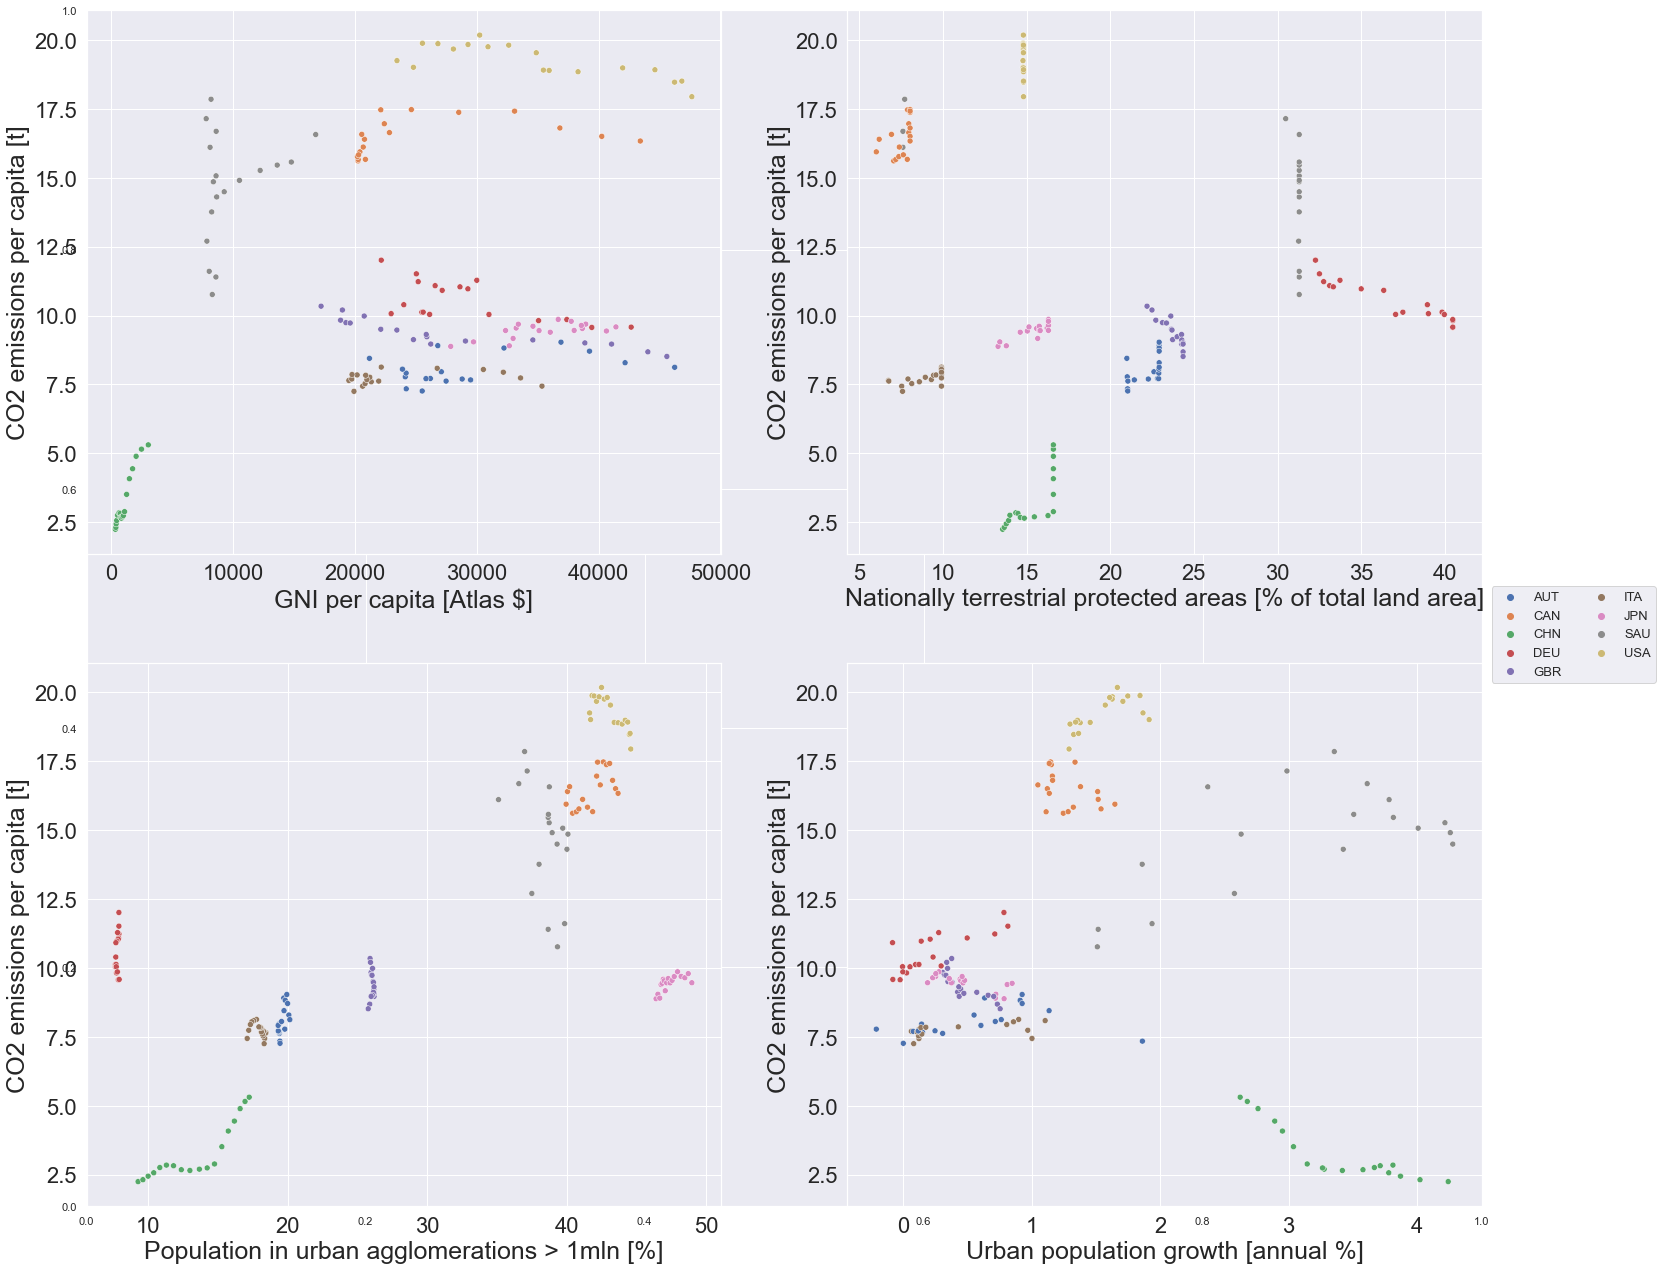

In [39]:
# set default settings of the seaborn library
sns.set()

# plot all scatterplots

fig,ax=plt.subplots(figsize=(25,22))
#fig.subplots_adjust(hspace=0.1, wspace=0.1)
ind=1


# set color theme
sns.set_context("paper")
sns.set(color_codes=True, font_scale=2)

for [col, label] in [['gni_per_cap',labels_dict['gni_per_cap']], ['prot_area_perc',labels_dict['prot_area_perc']], ['pop_urb_aggl_perc',labels_dict['pop_urb_aggl_perc']], ['urb_pop_growth_perc',labels_dict['urb_pop_growth_perc']]]:
    
    ax = fig.add_subplot(2,2,ind)
    sns.scatterplot(ax=ax, x=col, y="co2_per_cap", data=features_chosen, hue="country", legend='full')
    ax.legend_.remove()
    ax.set_xlabel(label, fontsize=25)
    ax.set_ylabel(labels_dict['co2_per_cap'], fontsize=25)
    ind+=1

# create common legend
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, ncol=2, loc='center right', fontsize=13)
plt.show()